In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.drop(columns=['User ID','Gender'],inplace=True)

In [6]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [7]:
import seaborn as sns

<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

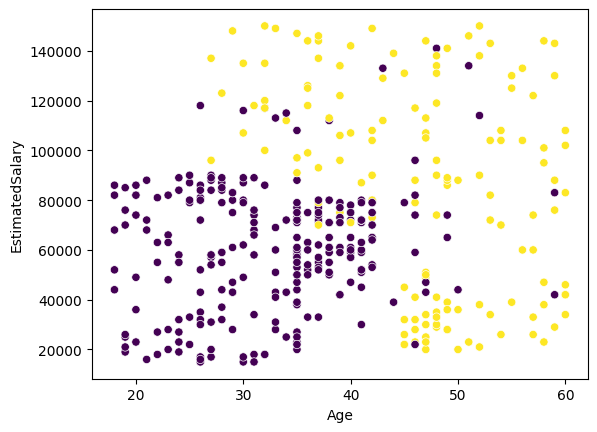

In [8]:
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'],c=df['Purchased'])

In [9]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 22ms/step - loss: 44.0334 - accuracy: 0.4625 - val_loss: 45.7567 - val_accuracy: 0.6500
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 49.8214 - accuracy: 0.5531 - val_loss: 24.9221 - val_accuracy: 0.3500
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 20.5834 - accuracy: 0.4906 - val_loss: 31.0558 - val_accuracy: 0.3500
Epoch 4/100
10/10 [==============================] - 0s 13ms/step - loss: 32.9425 - accuracy: 0.4719 - val_loss: 35.3622 - val_accuracy: 0.3500
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 23.9732 - accuracy: 0.4844 - val_loss: 52.2998 - val_accuracy: 0.6500
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 77.8446 - accuracy: 0.4938 - val_loss: 91.7439 - val_accuracy: 0.6500
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 73.3111 - accuracy: 0.5469 - val_loss: 19.3574 - val_accuracy:

10/10 [==============================] - 0s 11ms/step - loss: 18.9495 - accuracy: 0.5875 - val_loss: 27.8194 - val_accuracy: 0.3500
Epoch 58/100
10/10 [==============================] - 0s 11ms/step - loss: 16.9460 - accuracy: 0.5406 - val_loss: 17.1444 - val_accuracy: 0.6500
Epoch 59/100
10/10 [==============================] - 0s 11ms/step - loss: 37.8572 - accuracy: 0.4625 - val_loss: 17.1559 - val_accuracy: 0.3500
Epoch 60/100
10/10 [==============================] - 0s 10ms/step - loss: 44.9550 - accuracy: 0.5281 - val_loss: 14.7224 - val_accuracy: 0.6500
Epoch 61/100
10/10 [==============================] - 0s 10ms/step - loss: 16.9937 - accuracy: 0.5344 - val_loss: 40.4151 - val_accuracy: 0.6500
Epoch 62/100
10/10 [==============================] - 0s 10ms/step - loss: 64.5021 - accuracy: 0.5625 - val_loss: 96.6803 - val_accuracy: 0.6500
Epoch 63/100
10/10 [==============================] - 0s 10ms/step - loss: 57.2935 - accuracy: 0.5781 - val_loss: 3.6864 - val_accuracy: 0.3500

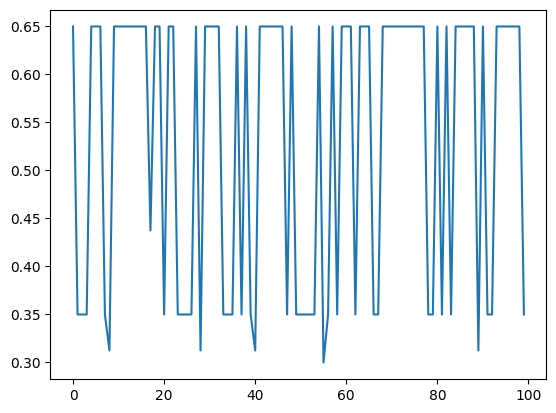

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

## applying scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

x_train_trf = scalar.fit_transform(x_train)
x_test_trf = scalar.transform(x_test)

In [20]:
x_train_trf

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

<AxesSubplot: >

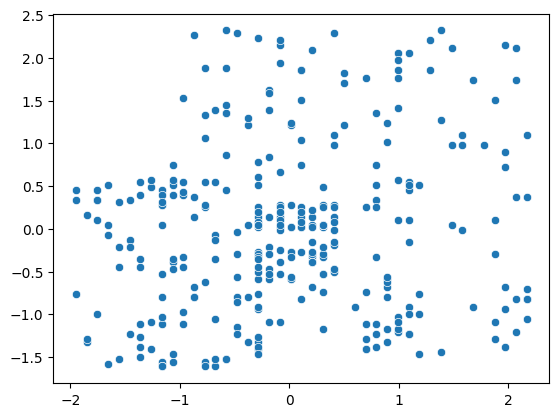

In [22]:
sns.scatterplot(x=x_train_trf[:,0],y=x_train_trf[:,1])

In [31]:
model1 = Sequential()

model1.add(Dense(128,activation='relu',input_dim=2))
model1.add(Dense(1,activation='sigmoid'))

In [32]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [33]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history1 = model1.fit(x_train_trf,y_train,validation_data=(x_test_trf,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 45ms/step - loss: 0.6488 - accuracy: 0.7219 - val_loss: 0.5855 - val_accuracy: 0.8250
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5995 - accuracy: 0.7594 - val_loss: 0.5303 - val_accuracy: 0.8375
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5581 - accuracy: 0.7719 - val_loss: 0.4849 - val_accuracy: 0.8500
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5234 - accuracy: 0.7875 - val_loss: 0.4466 - val_accuracy: 0.8500
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4935 - accuracy: 0.7969 - val_loss: 0.4126 - val_accuracy: 0.8375
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4669 - accuracy: 0.8031 - val_loss: 0.3847 - val_accuracy: 0.8500
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.4442 - accuracy: 0.8031 - val_loss: 0.3603 - val_accuracy: 0.8375
Epoch 

10/10 [==============================] - 0s 10ms/step - loss: 0.2577 - accuracy: 0.9031 - val_loss: 0.1732 - val_accuracy: 0.9375
Epoch 59/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2569 - accuracy: 0.9031 - val_loss: 0.1743 - val_accuracy: 0.9375
Epoch 60/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2570 - accuracy: 0.9031 - val_loss: 0.1730 - val_accuracy: 0.9375
Epoch 61/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2563 - accuracy: 0.9062 - val_loss: 0.1736 - val_accuracy: 0.9375
Epoch 62/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2558 - accuracy: 0.9031 - val_loss: 0.1744 - val_accuracy: 0.9375
Epoch 63/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2555 - accuracy: 0.9062 - val_loss: 0.1743 - val_accuracy: 0.9375
Epoch 64/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2549 - accuracy: 0.9062 - val_loss: 0.1747 - val_accuracy: 0.9250
Epoch 65/100
10

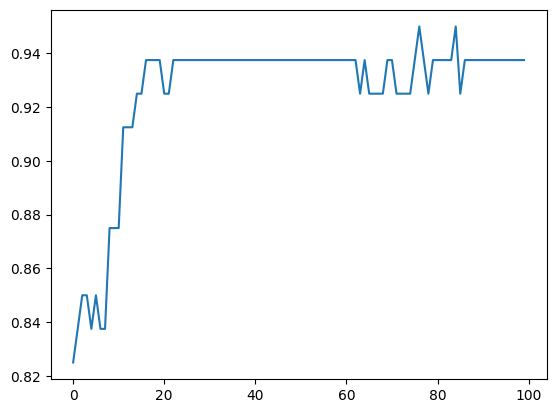

In [36]:
plt.plot(history1.history['val_accuracy'])